In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'AXISBANK.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-11-27,3.550000,3.550000,2.710000,3.400000,2.253108,21000
1998-11-30,3.250000,3.300000,3.100000,3.210000,2.127199,132000
1998-12-01,3.290000,3.460000,3.220000,3.390000,2.246482,123500
1998-12-02,3.360000,3.440000,3.320000,3.390000,2.246482,75500
1998-12-03,3.440000,3.490000,3.370000,3.390000,2.246482,102000
...,...,...,...,...,...,...
2024-06-20,1230.099976,1241.500000,1220.400024,1239.500000,1239.500000,8206858
2024-06-21,1246.000000,1246.000000,1223.750000,1237.449951,1237.449951,29311314
2024-06-24,1231.000000,1235.750000,1225.050049,1228.099976,1228.099976,6676530


In [2]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=20)

[array([0.0007249 , 0.0005768 , 0.00071711, 0.00071711, 0.00071711,
       0.00071711, 0.00070931, 0.00060019, 0.00060019, 0.00056901,
       0.00053783, 0.00055342, 0.00053004, 0.00051445, 0.00047547,
       0.00041312, 0.00045209, 0.00045988, 0.0004443 , 0.00041312])]
[0.00041311681955814427]

[array([0.0007249 , 0.0005768 , 0.00071711, 0.00071711, 0.00071711,
       0.00071711, 0.00070931, 0.00060019, 0.00060019, 0.00056901,
       0.00053783, 0.00055342, 0.00053004, 0.00051445, 0.00047547,
       0.00041312, 0.00045209, 0.00045988, 0.0004443 , 0.00041312]), array([0.0005768 , 0.00071711, 0.00071711, 0.00071711, 0.00071711,
       0.00070931, 0.00060019, 0.00060019, 0.00056901, 0.00053783,
       0.00055342, 0.00053004, 0.00051445, 0.00047547, 0.00041312,
       0.00045209, 0.00045988, 0.0004443 , 0.00041312, 0.00041312])]
[0.00041311681955814427, 0.00041311681955814427]




Epoch 1/20

606/606 [==============================] - 30s 30ms/step - loss: 0.0033
Epoch 2/20
606/606 [=====

In [4]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

190/190 [==============================] - 1s 8ms/step


0.9989924434897873

In [5]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

10/10 [==============================] - 0s 8ms/step


0.9737731354444302

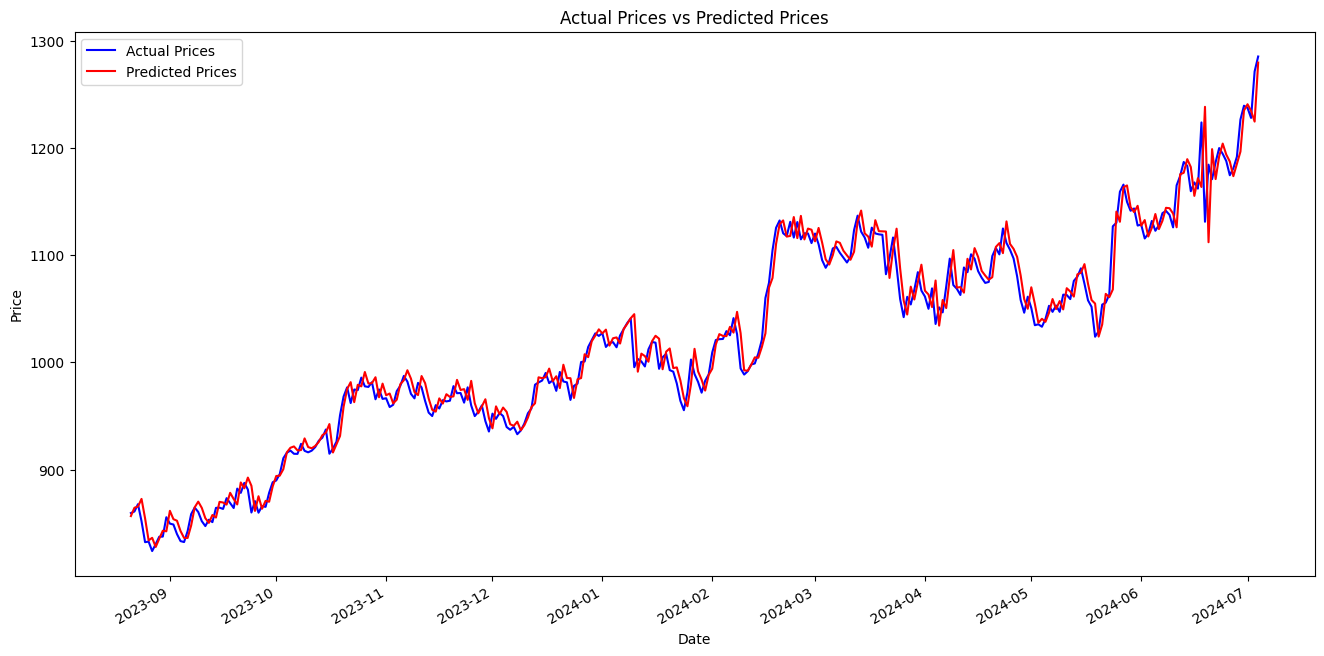

In [6]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [7]:
import joblib


model_file_path = '11.joblib'
scaler_file_path = 'scaler11.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 11.joblib
Scaler saved to scaler11.joblib
